In [132]:
import importlib
import audio_processing as ap

In [134]:
importlib.reload(ap)

<module 'audio_processing' from 'X:\\2 SCIENCE\\PROJECTS\\birdify\\audio_processing\\__init__.py'>

In [175]:
from tqdm import tqdm
from pytimeparse.timeparse import timeparse

In [26]:
import numpy as np
import pandas as pd
import tempfile
import os
import os.path
import wave
from IPython.display import Audio, display
import matplotlib.pylab as plt
from scipy import stats
import librosa
from pathlib import Path
from pydub import AudioSegment
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
data = pd.read_csv(r'metadata.csv')
data['Name'] = data.Genus +' '+ data.Specific_epithet

data.set_index('Path', inplace=True)
data.Time = data.Time.where(data.Time.str.contains(':'))
data.Time = data.Time.apply(lambda x: timeparse(str(x)))

In [186]:
for f in data[data.Time.isna()].index:
    signal = AudioSegment.from_mp3(f)
    fs = signal.frame_rate
    signal, _ = librosa.load(f, sr=fs)
    data.at[f, 'Time'] = signal.shape[0]/fs

C:\Users\antos\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


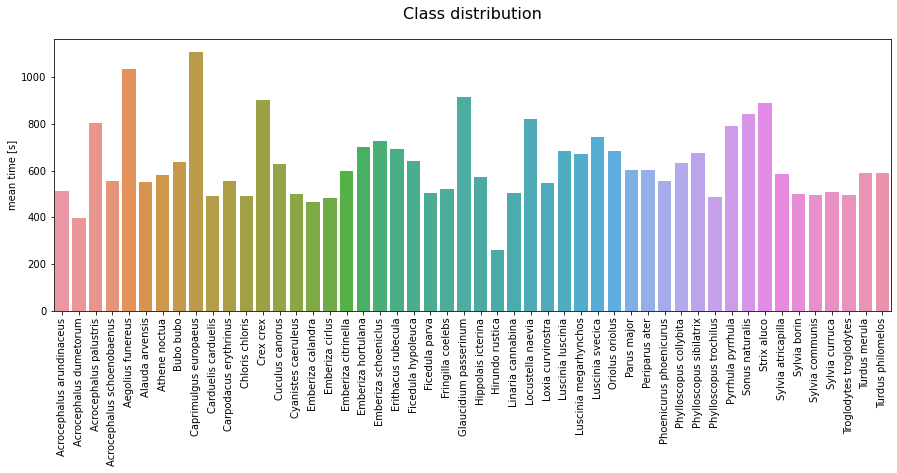

In [231]:
plotting = data.groupby(['Name'])['Time'].mean()

plt.figure(figsize=(15,5))
sns.barplot(x=plotting.index, y=plotting.values)
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.ylabel('mean time [s]')
plt.title('Class distribution', fontdict={'size':16}, y=1.05)
plt.show()

In [232]:
data.reset_index(inplace=True)

In [234]:
class_names = data.Name.unique()

In [86]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

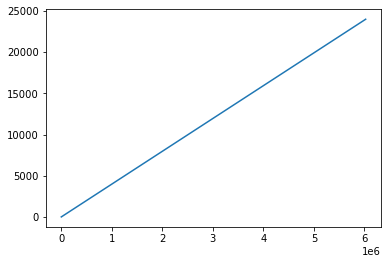

In [100]:
plt.plot(freq)

In [241]:
from python_speech_features import mfcc, logfbank

In [249]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

# for c in class_names:
#     mp3_file = data[data.Name == c].iloc[0,0]
#     song = AudioSegment.from_mp3(file)
#     fs = song.frame_rate
#     signal, _ = librosa.load(file, sr=fs)
#     signals[c] = signal
#     fft[c] = calc_fft(signal, fs)
    
#     bank = logfbank(signal[:fs], fs, nfilt=128, nfft=1200).T
#     fbank[c] = bank
#     mel = mfcc(signal[:fs], fs, numcep=64, nfilt=128, nfft=1200).T
#     mfccs[c] = mel

In [ ]:
plt.plot(signals)
plt.show()

C:\Users\antos\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


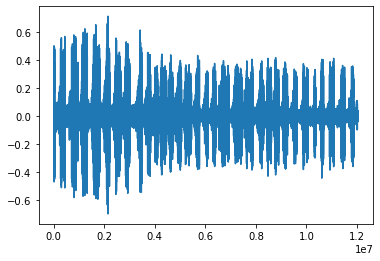

In [36]:
file = r'./mp3/Acrocephalus-arundinaceus-178787.mp3'
song = AudioSegment.from_mp3(file)
fs = song.frame_rate

signal, _ = librosa.load(file, sr=fs)
plt.plot(signal)
plt.show()

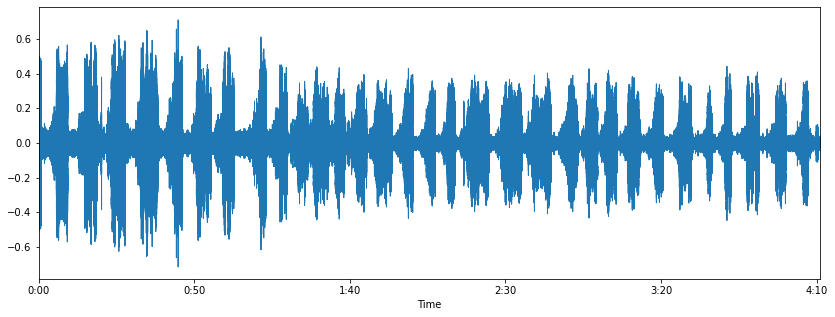

In [82]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=fs)
plt.show()

In [92]:
# import IPython.display as ipd
# ipd.Audio(x, rate=fs)

(513, 1000)


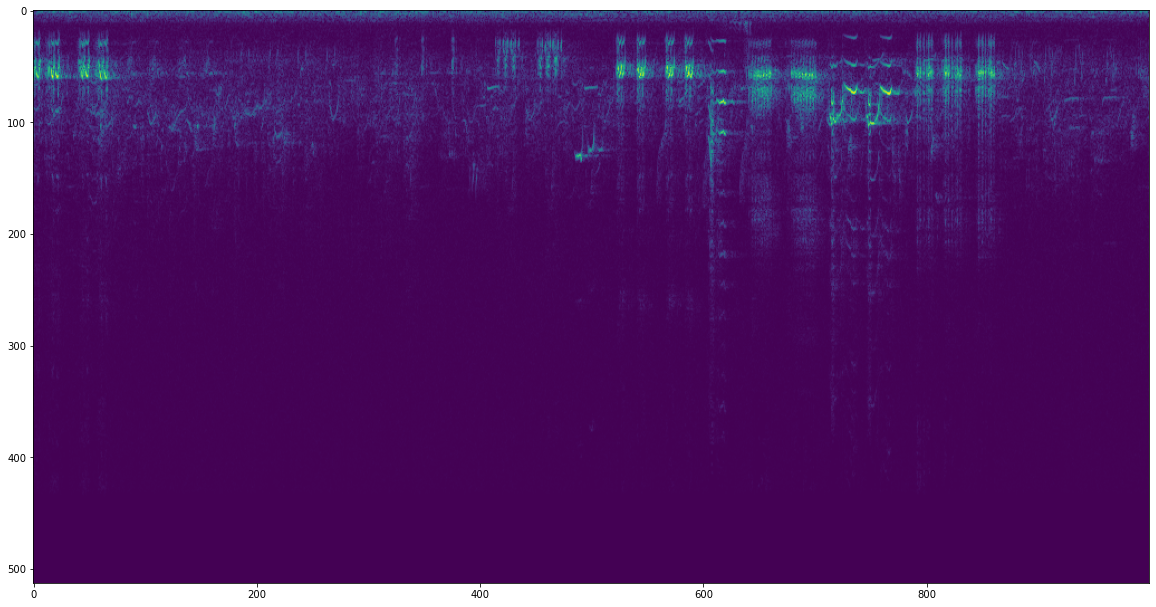

In [95]:
WINDOW_SIZE = 1024
y = librosa.stft(x, hop_length=512, n_fft = WINDOW_SIZE)#, hop_length = 512)
# y = librosa.feature.melspectrogram(x, sr=44100, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE)

y = np.log1p(np.abs(y[:,:1000]))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()